In [1]:
# import the netCDF4 module
import xarray as xr
import numpy as np
import datetime

In [3]:
# load the categorize file in the data folder
f = xr.open_mfdataset('data/20180624_leipzig_categorize.nc', combine='by_coords')
print(f)

<xarray.Dataset>
Dimensions:               (height: 479, model_height: 21, time: 2879)
Coordinates:
  * time                  (time) datetime64[ns] 2018-06-24T00:00:45.000000670 ... 2018-06-24T23:59:44.996795654
  * height                (height) float32 304.0752 335.2544 ... 15768.959
  * model_height          (model_height) float32 289.1111 ... 16566.666
Data variables:
    altitude              float32 ...
    latitude              float32 ...
    longitude             float32 ...
    rainrate              (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    lwp                   (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    lwp_error             (time) float32 dask.array<shape=(2879,), chunksize=(2879,)>
    radar_frequency       float32 ...
    lidar_wavelength      float32 ...
    Z                     (time, height) float32 dask.array<shape=(2879, 479), chunksize=(2879, 479)>
    v                     (time, height) float32 dask.array<shape=(2879, 47

In [4]:
# make variables more readable
for variable in f.variables.keys(): 
    print(variable)
    
# copy time and height values to local variables   
time = f.variables['time'][:]
height = f.variables['height'][:]

rainrate = f.variables['rainrate'][:]


altitude
latitude
longitude
time
height
model_height
rainrate
lwp
lwp_error
radar_frequency
lidar_wavelength
Z
v
width
ldr
Z_bias
Z_error
Z_sensitivity
beta
beta_bias
beta_error
lidar_depolarisation
temperature
pressure
specific_humidity
uwind
vwind
radar_gas_atten
radar_liquid_atten
sigma_zbeta
mean_zbeta
numgates_zbeta
category_bits
quality_bits


In [6]:
%matplotlib inline

In [33]:
airtemps = xr.tutorial.open_dataset("air_temperature")

In [34]:
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [35]:
# Convert to celsius
air = airtemps.air - 273.15
# copy attributes to get nice figure labels and change Kelvin to Celsius
air.attrs = airtemps.air.attrs
air.attrs["units"] = "deg C"


In [36]:
# select one grid box
air1d = air.isel(lat=10, lon=10)

In [41]:
air1d

<xarray.DataArray 'air' (time: 2920)>
array([7.640015, 7.850006, 8.049988, ..., 9.339996, 9.339996, 9.540009],
      dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 225.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         deg C
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

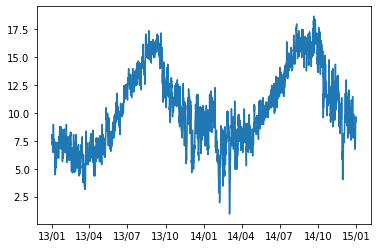

In [46]:
fig, ax = plt.subplots(1)
ax.plot(air1d.time, air1d)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%y/%m'))

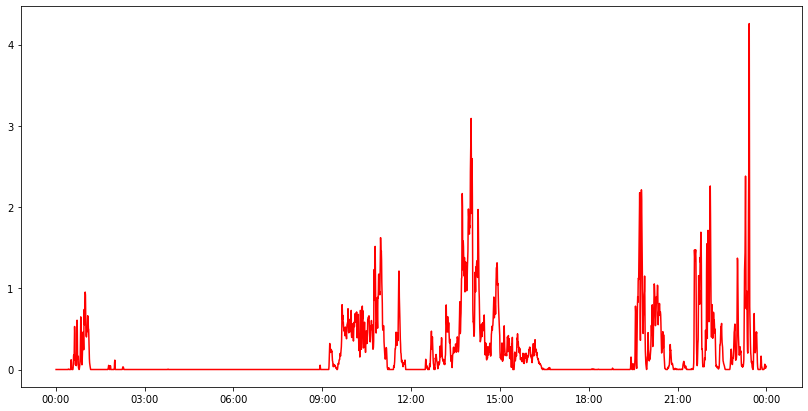

In [50]:
# plot with the rainrate

import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots(1, figsize=(14,7))
ax.plot(time, rainrate, 'r-^')
#ax.plot(time, rainrate)

# some more visual candy
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))

In [8]:
# Some adjustments to the axis labels, ticks and fonts
def load_xy_style(ax, xlabel='Time [UTC]', ylabel='Height [m]'):
    """
    Method that alters the apperance of labels on the x and y axis in place.
    
    Note:
        If xlabel == 'Time [UTC]', the x axis set to major 
        ticks every 3 hours and minor ticks every 30 minutes.
    
    Args:
        ax (matplotlib.axis) :: axis that gets adjusted
        **xlabel (string) :: name of the x axis label
        **ylabel (string) :: name of the y axis label
    
    """
    
    ax.set_xlabel(xlabel, fontweight='semibold', fontsize=15)
    ax.set_ylabel(ylabel, fontweight='semibold', fontsize=15) 
    if xlabel == 'Time [UTC]':
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
        ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=3))
        ax.xaxis.set_minor_locator(matplotlib.dates.MinuteLocator(byminute=[0,30]))
        ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(500))
    ax.tick_params(axis='both', which='major', labelsize=14, width=3, length=4)
    ax.tick_params(axis='both', which='minor', width=2, length=3)
    
def load_cbar_style(cbar, cbar_label=''):
    """
    Method that alters the apperance of labels on the color bar axis in place.
    
    Args:
        ax (matplotlib.axis) :: axis that gets adjusted
        **cbar_label (string) :: name of the cbar axis label, Defaults to empty string.
    
    """
    cbar.ax.set_ylabel(cbar_label, fontweight='semibold', fontsize=15)
    cbar.ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=4)

-69.50555


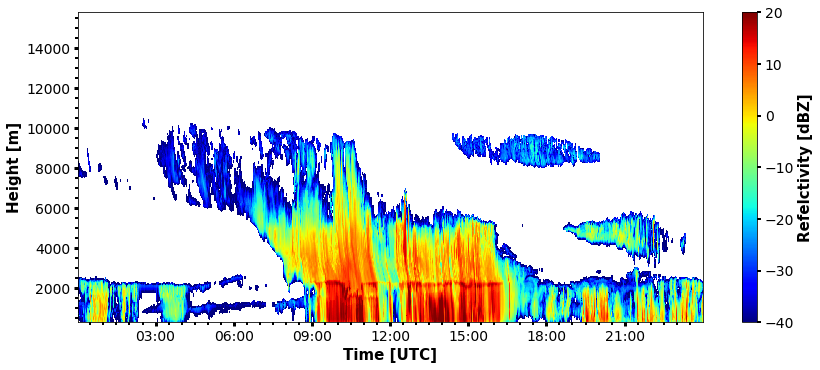

In [15]:
# reflectivity plot

Z = f['Z'].values
print(np.nanmin(Z))

Z = np.ma.masked_less(Z, -99)

fig, ax = plt.subplots(1, figsize=(14, 5.7))
pcmesh = ax.pcolormesh(time, height, np.transpose(Z), cmap='jet', vmin=-40, vmax=20)
cbar = fig.colorbar(pcmesh)

load_xy_style(ax)
load_cbar_style(cbar, cbar_label="Refelctivity [dBZ]")


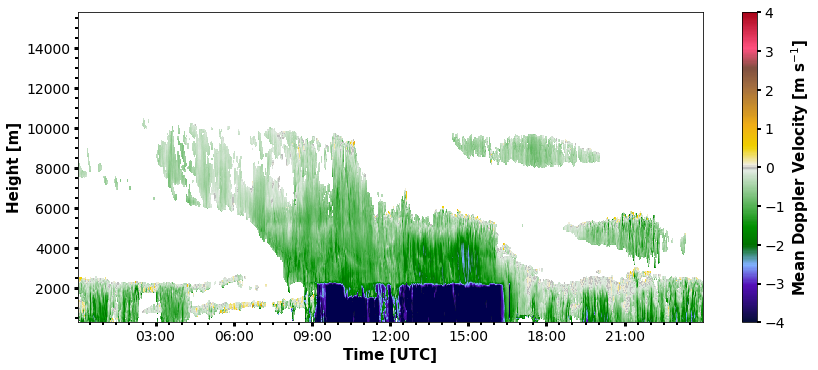

In [14]:
# similar for velocity
import Colormaps


v = f['v'].values
v = np.ma.masked_less(v, -99)

fig, ax = plt.subplots(1, figsize=(14, 5.7))
pcmesh = ax.pcolormesh(time, height, np.transpose(v),
                       cmap=Colormaps.carbonne_map, vmin=-4, vmax=4)

cbar = fig.colorbar(pcmesh)

load_xy_style(ax)
load_cbar_style(cbar, cbar_label=r"Mean Doppler Velocity [m s$^{-1}$]")

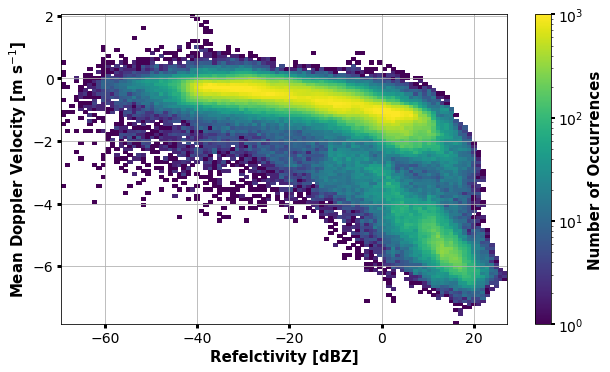

In [19]:
# 2d histogram

mask = np.ma.mask_or(Z.mask, v.mask)
Z.mask = mask
v.mask = mask
H, xedges, yedges = np.histogram2d(Z[~np.isnan(Z)].flatten(), v[~np.isnan(v)].flatten(),
                                   bins=[100,100])

fig, ax = plt.subplots(1, figsize=(10, 5.7))
pcmesh = ax.pcolormesh(xedges, yedges, np.transpose(H),
                       norm=matplotlib.colors.LogNorm(1, vmax=1000),
                       cmap='viridis')
cbar = fig.colorbar(pcmesh)

load_xy_style(ax, xlabel='Refelctivity [dBZ]', ylabel=r"Mean Doppler Velocity [m s$^{-1}$]")
load_cbar_style(cbar, cbar_label='Number of Occurrences')
ax.grid()

In [31]:
import pandas as pd
datestring = pd.to_datetime(time[0].values).strftime("%Y%m%d")

save figure: 20180624_beta_depol.png


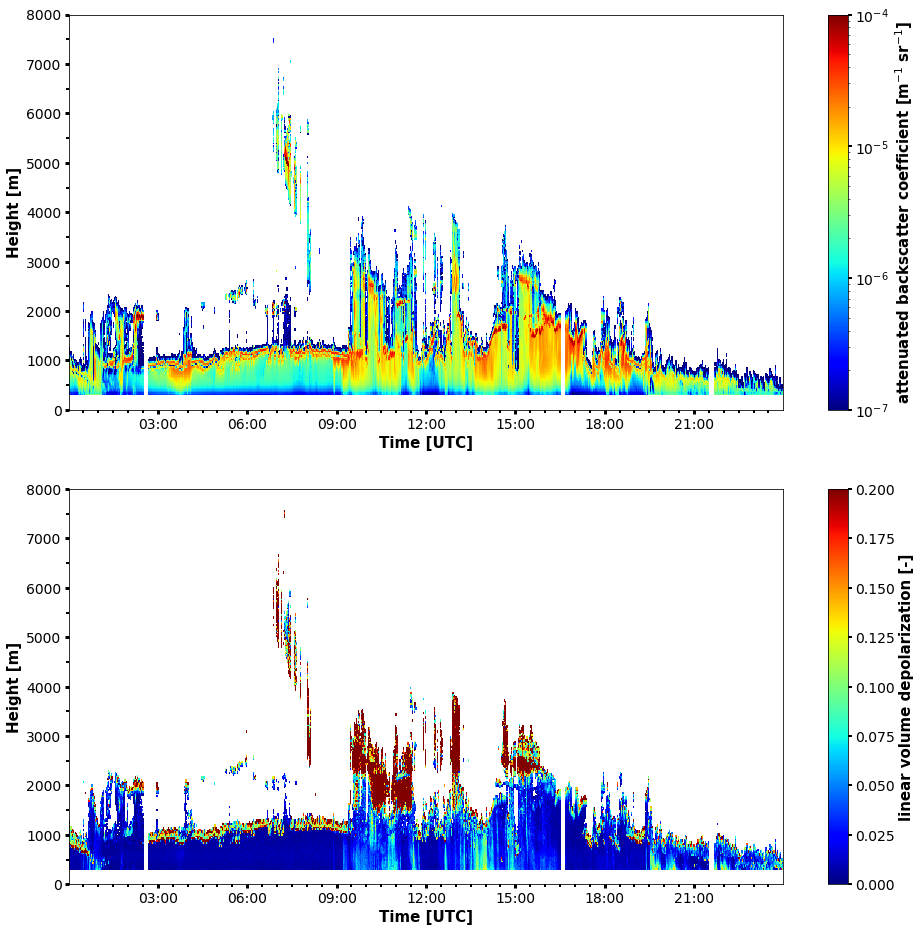

In [32]:
# lidar beta and linear depolarization in one figure with two subplots

beta, depol = f['beta'].values, f['lidar_depolarisation'].values

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))
ax0_pcmesh = ax0.pcolormesh(time, height, np.transpose(beta), cmap='jet', 
                              norm=matplotlib.colors.LogNorm(1.e-7, vmax=1.e-4))
ax0_cbar = fig.colorbar(ax0_pcmesh, ax=ax0)
load_xy_style(ax0)
load_cbar_style(ax0_cbar, cbar_label=r"attenuated backscatter coefficient [m$^{-1}$ sr$^{-1}$]")

depol = np.ma.masked_less_equal(depol, 0.0)    # mask values below (incl) 0 for better visibility
ax1_pcmesh = ax1.pcolormesh(time, height, np.transpose(depol), cmap='jet', vmin=0, vmax=0.2)
ax1_cbar = fig.colorbar(ax1_pcmesh, ax=ax1)
load_xy_style(ax1)
load_cbar_style(ax1_cbar, cbar_label=r"linear volume depolarization [-]")

ax0.set_ylim([0, 8000])
ax1.set_ylim([0, 8000])

savename = f'{datestring}_beta_depol.png'
print(f'save figure: {savename}')
fig.savefig(savename, dpi=250)

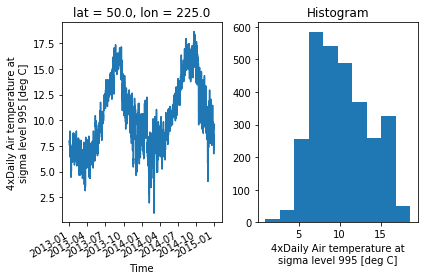

In [54]:
# subplots
fig, axes = plt.subplots(ncols=2)
air1d.plot(ax=axes[0])
air1d.plot.hist(ax=axes[1])
plt.tight_layout()

In [55]:
air2d = air.isel(time=500)

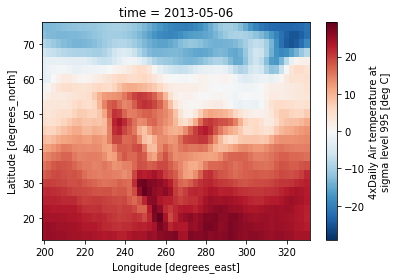

In [56]:
air2d.plot()

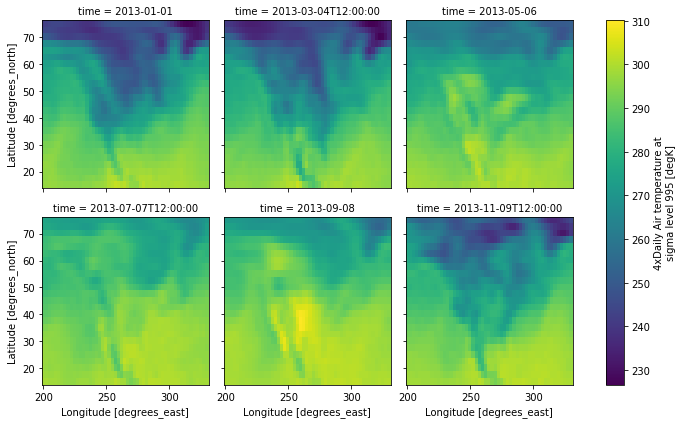

In [66]:
# slice to pick 6 times throughout the year
air = xr.tutorial.open_dataset("air_temperature").air
t = air.isel(time=slice(0, 365 * 4, 250))
g_simple = t.plot(x="lon", y="lat", col="time", col_wrap=3)